# 課題　クラウドファンデイングが成功するか事前に予測

データセットはkickstarter Projectsを用いる。  
クラウドファンデイングが成功するか失敗するかの2値分類問題で、使うモデルはロジスティック回帰である。  
このデータにどんな項目があるのか見てみる。

## 1. データについて
### 1.1. 各項の意味
![](date.pdf)
このように15項目がある  
意味が被っているものがあり、何をみるべきか考えるべきだ。

### 1.2 データの確認、情報

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,recall_score,precision_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df_kickstarter = pd.read_csv("ks-projects-201801.csv")

df_kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
df_kickstarter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


データの総数は378661である。  
欠損値がありそうなので確認。

In [4]:
df_kickstarter.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

nameが4つ、usd pledgedが3797個欠損値ある。  
この欠損値をどう処理するか次見てみる。

## 2. 欠損値処理
先ほど2つの項目で欠損値が見られた。このままではモデルに使えないので処理してこう
### 2.1 name
データ数3786661に対して欠損値は4。テストデータも豊富で、欠損値も少ないので単純に欠損値のものを省こう。

In [5]:
df_drop_name_kickstarter = df_kickstarter.dropna(subset=['name'])

### 2.2 usd pledged
この項目は集まった資金の米ドル換算であるが、同じ意味の項目のusd_pledged_realがある。  
usd pledgedとusd_pledged_realの違いは換算の方法であるが、usd_pledged_realの方がusd_goal_realと換算方法も同じで扱いやすい。  
欠損値のあるusd pledgedの列は無視しよう。

In [6]:
df_drop_kickstarter = df_drop_name_kickstarter.drop(["usd pledged"],axis = 1)
df_drop_kickstarter.info()
df_drop_kickstarter.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378657 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378657 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378657 non-null  object 
 3   main_category     378657 non-null  object 
 4   currency          378657 non-null  object 
 5   deadline          378657 non-null  object 
 6   goal              378657 non-null  float64
 7   launched          378657 non-null  object 
 8   pledged           378657 non-null  float64
 9   state             378657 non-null  object 
 10  backers           378657 non-null  int64  
 11  country           378657 non-null  object 
 12  usd_pledged_real  378657 non-null  float64
 13  usd_goal_real     378657 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 43.3+ MB


ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

欠損値はなくなり、項目数は14になり、データ数は378657になった。

## 3. 目的変数と説明変数
処理がしやすいように、bool値や数値に変換できるものはする。  
また意味のない変数は落としていく。
### 3.1 目的変数 (state)
目的変数はプロジェクトの状態を表すstateである。  
どんなものがあるか見てみると

In [7]:
df_drop_kickstarter.state.value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

成功か失敗かを予測したいので、failedとsuccessfulだけにして、他は捨てた方が良いだろう。  
また、扱いやすいように"True"、"False"のbool値に

In [8]:
df_drop_kickstarter = df_drop_kickstarter[(df_drop_kickstarter["state"] == "failed") | (df_drop_kickstarter["state"] == "successful")]
df_drop_kickstarter["state"] = (df_drop_kickstarter["state"] == "successful")
df_drop_kickstarter.state.value_counts()

False    197716
True     133956
Name: state, dtype: int64

### 3.2 説明変数
今、説明変数は13個ある。  
取捨選択や変数をまとめてみる。  
また詳しい統計は別ファイルの[kickstarter.html](kickstarter.html)にある。これも参考にする
### 3.2.1 意味が被っているもの
カテゴリはcategoryとmain_categoryがある。  
[kickstarter.html](kickstarter.html)をみるとdistinctがcategoryは159、main_categoryは15。少ない方がまとまっていて扱いやすいのでmain_categoryを採用。

集まった資金とゴール額が2つずつある。それぞれ米ドル換算した方が比較しやすいのでusd_pledged_real、usd_goal_realを採用。

In [9]:
df_date = df_drop_kickstarter.drop(["category","pledged","goal"],axis = 1)

### 3.2.2 2変数を1つに
launchedとdeadlineはその日に大きな意味を持つより、deadlineからlaunchedを引いた期間の方が重要そう。また、1つにまとまって良い。

In [10]:
#今launchedとdeadlineの型
print(df_date.launched.dtype)
#datetime型に変換
df_date.launched = pd.to_datetime(df_date["launched"])
df_date.deadline = pd.to_datetime(df_date["deadline"])
print(df_date.launched.dtype)
#クラウドファンディング期間を求める
df_date["Days"]=df_date["deadline"]-df_date["launched"]
print(df_date.Days.dtype)
#細かいデータでなく日数にする。pd.Seriesの日付属性dayを使って
df_date["Days"] = df_date["Days"].dt.days
df_date = df_date.drop(["launched","deadline"],axis = 1)

object
datetime64[ns]
timedelta64[ns]


### 3.2.3 予測に役立たないもの、使っていけないもの
明らかにIDと名前はいらないだろう

In [11]:
df_date = df_date.drop(["ID","name"],axis = 1)

また、予測に使っていけないと思われる変数がある。  
それは予測時に持っていない変数。つまりクラウドファンディング後に得られる変数である。  
集まった資金と支援者の項目は消そう。usd_pledged_realとbackers

In [12]:
df_date = df_date.drop(["usd_pledged_real","backers"],axis = 1)
df_date.head()

,main_category,currency,state,country,usd_goal_real,Days
0,Publishing,GBP,False,GB,1533.95,58
1,Film & Video,USD,False,US,30000.00,59
2,Film & Video,USD,False,US,45000.00,44
3,Music,USD,False,US,5000.00,29
5,Food,USD,True,US,50000.00,34


こんな感じになった。  
説明変数は5つになった。ちょっと削りすぎたかな？  
データ数もstateで削ったので331672個。十分にあるだろう。

## 4. 目的変数と説明変数の関係
### 4.1 ゴール額と期間

In [13]:
# 相関係数を確認
df_date_num = df_date.loc[:,["state","usd_goal_real","Days"]]
df_date_num.corr()

,state,usd_goal_real,Days
state,1.000000,-0.023735,-0.116438
usd_goal_real,-0.023735,1.000000,0.021606
Days,-0.116438,0.021606,1.000000


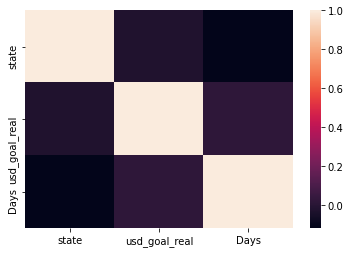

In [14]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_date_num.corr())
plt.show()

数値のものはこんな感じになった。  
objectの相関はこうなった。1が成功、0が失敗

### 4.2 メインカテゴリ

<AxesSubplot:xlabel='count', ylabel='main_category'>

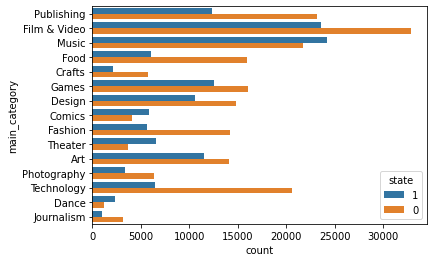

In [15]:
sns.countplot(y="main_category", hue="state", hue_order=[1,0], data=df_date)

### 4.3 使用通貨

<AxesSubplot:xlabel='count', ylabel='currency'>

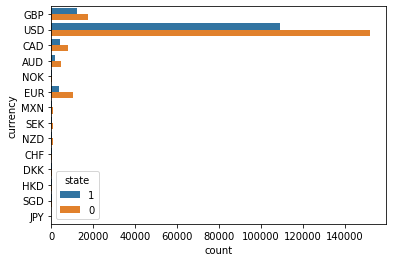

In [16]:
sns.countplot(y="currency", hue="state", hue_order=[1,0], data=df_date)

### 4.4 プロジェクトが開かれた国

<AxesSubplot:xlabel='count', ylabel='country'>

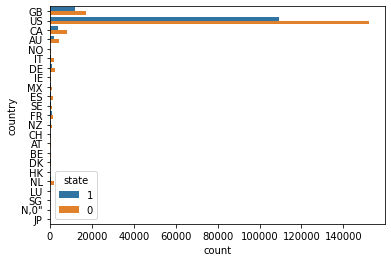

In [17]:
sns.countplot(y="country", hue="state", hue_order=[1,0], data=df_date)

## 5. ロジスティック回帰
### 5.1. 質的変数をダミー変数に
このままではモデルに入れれないので、ダミー変数に変化させる。

In [22]:
#use_col = ["main_category","currency","country"]

df_date_dummy = pd.get_dummies(df_date)
df_date_dummy.head()
df_date_dummy.to_csv('Day1_date.csv')
df_date_dummy.head()

,state,usd_goal_real,Days,main_category_Art,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,False,1533.95,58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,30000.00,59,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,False,45000.00,44,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,False,5000.00,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,True,50000.00,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 5.2 ロジスティック回帰で学習

In [19]:
y = df_date_dummy["state"].values
X = df_date_dummy.drop('state', axis=1).values

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3, )
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=1234, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

### 5.3 予測、正答率、クロス集計

In [20]:
# ラベルを予測
y_est = clf.predict(X)

# 確率値を得るa
y_est_proba = clf.predict_proba(X)

# 対数尤度を表示
# log_lossという関数は、負の対数尤度を返す
# normalizeという引数をTrueにすると、合計の対数尤度ではなく平均の対数尤度が計算される
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est_proba, normalize=False))) 

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

対数尤度 = -5609822.601
正答率 = 51.030%


In [21]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
display(conf_mat)

print("Accuracy: {:.5f}".format(accuracy_score(y, y_est)))
print("precission : {:.5f}".format(precision_score(y, y_est)))
print("recall : {:.5f}".format(recall_score(y, y_est)))

,予測 = 成功,予測 = 失敗
正解 = 成功,50196,147520
正解 = 失敗,14901,119055


Accuracy: 0.51030
precission : 0.44661
recall : 0.88876


これからもっと良くしていこう